# The Perceptron Algorithm

This notebook illustrates how the perceptron algorithm can be used to classify data. The perceptron algorithm will be used to define a linear boundary for a dataset containing $(x_1,x_2)$ points that are labelled either as $\{-1,1\}$. In order to achieve this, the dataset will be created so that it is linearly separable, by first defining an arbitrary linear boundary and sampling random points. In essence, the perceptron algorithm will be used to 'rediscover' the chosen linear boundary. 

To define the arbitrary linear boundary, the parameters $w \in R^2$ and $b \in R$ will be fixed, such that $w \cdot x + b = 0 $ defines the linear boundary. 

To create the dataset, random points will be sampled and labelled as +1 if $w \cdot x + b > 0 $ or -1 if $w \cdot x + b < 0 $. As such, the random points will be classified depending on which side of the boundary they fall on.

The perceptron algorithm will then be used to go backwards, that is, use the dataset and labels to determine the parameters $w$ and $b$ of the linear boundary that originally separated the data.

### Plotting a linear boundary

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

First, a linear boundary is established by selecting $w$ and $b$ parameters.

In [2]:
w = [-0.4, 1]
b = -30

A lower and upper bound for our dataset needs to be chosen.

In [3]:
x_min = 0
x_max = 100

The lists `x1_boundary` and `x2_boundary` will contain the x and y coordinates of the linear boundary.

In [4]:
x1_boundary = np.linspace(x_min, x_max, 1000)
x2_boundary = (-w[0]*x1_boundary-b)/w[1]

Plot the boundary.

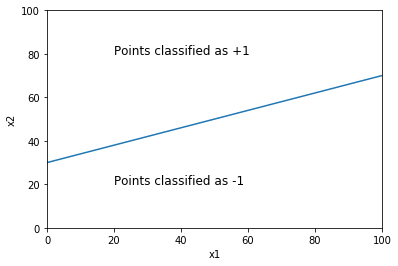

In [5]:
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)

plt.text(20, 80, 'Points classified as +1', fontsize=12)
plt.text(20, 20, 'Points classified as -1', fontsize=12)

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x1_boundary, x2_boundary)

### Creating a dataset that is labelled by the linear boundary

Create a list of containing random $x$ coordinates.

In [6]:
number_of_points = 100

np.random.seed(1000)
x = np.random.uniform(x_min, x_max, (number_of_points,2))

Create a list called `label` that contains the +1 or -1 labels of the linear boundary defined in the previous section. Each of the labels are computed as: $\text{sign}(w \cdot x + b)$

In [7]:
# Note: we are assuming no random points exist on the line itself.
label = [np.sign(np.dot(w,point)+b) for point in x]

Create a Pandas DataFrame that contains the data and the labels. This will enable a plot of the coordinates to be created using Seaborn.

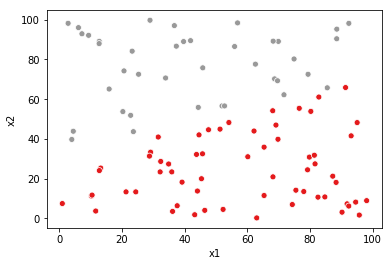

In [8]:
df = pd.DataFrame(x, columns = ['x1','x2'])
df['label']=label
sns.scatterplot(x='x1', y='x2', hue='label',data=df, legend=False, palette="Set1")

### Utilising the Perceptron Algorithm

Now that a dataset has been created, the perceptron algorithm can be used to establish a linear boundary that correctly classifies the data.

The perceptron algorithm is:

1. Initialise w and b to be 0.
2. Cycle through the dataset. 
    - If a point has been incorrectly classified, i.e $y(w \cdot x + b) \leqslant 0$ where $y$ is the label of the point, then:
    
        $w \rightarrow w + yx$ <br>
        $b \rightarrow b + y$
        
        
3. Terminate the cycle if all points have been correctly classified.

The code below implements this algorithm on the previously constructed dataset to determine $w$ and $b$ values that define a linear boundary between the two sides. 

In [9]:
# Initialise both w and b to have zero values
w = np.zeros(2)
b = 0

# i will be used as an iterator in the coming while loop.
i = 0

# points_checked acts as a counter in the iterator to see how many points have been 
# classified correctly. It is used to determine when to exit the while loop.
points_checked = 0

while points_checked != number_of_points:
    
    i += 1
    
    # The iterator i is used to determine what point is being studied. 
    # The use of the mod symbol % is required because the points are being cycled across.
    point = x[i % number_of_points]
    label_for_point = label[i % number_of_points]
   
  
    if label_for_point*(np.sign(np.dot(w,point)+b)) <= 0:
        
        # the current w and b values incorrectly classify the current point.
        # A reset needs to be done on points_checked.
        points_checked = 0
        
        # change the w and b values based on the algorithm.
        w += label_for_point * point
        b += label_for_point
    
    else:
        
        # the current point was correctly classified.
        points_checked += 1

# The while loop has exited because the points_checked = number_of_points.
# This means that all points were correctly classified by the linear boundary defined
# by the following parameters.
print('Classifier found after {} iterations'.format(i))
print('w: {}'.format(w))
print('b: {}'.format(b))


Classifier found after 416514 iterations
w: [-113.32565882  265.2922162 ]
b: -7344.0


Use these parameters to determine the predicted label for each of the points. Add the predicted label to the pandas dataframe. 

In [10]:
predicted_label = [np.sign(np.dot(w,point)+b) for point in x]
df['predicted_label'] = predicted_label

The predicted labels are the same as the actual labels, which can be seen by executing:

In [11]:
any(df['label'] == df['predicted_label']) == False

False

Create the lists `x1` and `x2` that define the coordinates of the linear boundary that the algorithm has supplied.

In [12]:
x1 = np.linspace(0, 100, 1000)
x2 = (-w[0]*x1-b)/w[1]

Plot the data and the linear boundary that the algorithm has supplied.

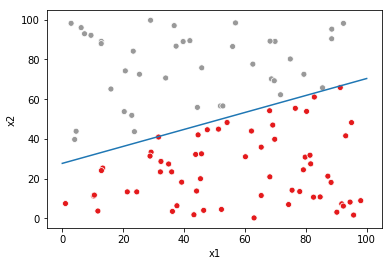

In [13]:
sns.scatterplot(x='x1', y='x2',data=df, hue='predicted_label', legend=False, palette="Set1")
plt.plot(x1,x2)


It can be seen that the algorithm correctly produces a linear boundary that separates the two sides. 
Not suprisingly, the parameters the algorithm has produced are not identical to the ones that defined and labelled the dataset originally. The algorithm suggests a boundary of:

$-113.32565882 x_1 + 265.2922162 x_2 - 7344.0 = 0 $

Dividing by 265.2922162 gives us:

$-0.42717295080593476 x_1 + x_2 - 27.68268178084601 = 0$

This is similar to the linear boundary that defined the dataset originally:

$-0.4 x_1 + x_2 - 30 = 0$

## Dual form of the perceptron algorithm

There exists a 'dual' form of the perceptron algorithm. The final solution of $w$ will be of the form:

$ w = \Sigma_{i} \alpha_{i}y^{(i)}x^{(i)}$

Where $a_i$ are coefficients. The dual form of the perceptron algorithm requires one to update the $a_i$ coefficients as well as the bias term $b$. 

The perceptron algorithm is:

1. Initialise $\alpha$ and b to be 0.
2. Cycle through the dataset. 
    - If a point $x^{(i)}$ has been incorrectly classified, i.e $y^{(i)}(w \cdot x^{(i)} + b) \leqslant 0$ where $y$ is the label of the point, then:
    
        $\alpha_i \rightarrow \alpha_i + 1$ <br>
        $b \rightarrow b + y^{(i)}$
        
        
3. Terminate the cycle if all points have been correctly classified.

The code below implements this algorithm on the previously constructed dataset to determine $w$ and $b$ values that define a linear boundary between the two sides. 

In order to implement the dual form of the percepton algorithm, the helper function `determine_w(alpha, points, labels)` is created to calculate $ w = \Sigma_{i} \alpha_{i}y^{(i)}x^{(i)}$

In [108]:
def determine_w(alpha, points, labels):
    
    sum = np.zeros(len(points[0]))
    
    for i in range(len(points)):
    
        sum += alpha[i]*labels[i]*points[i]
    
    return sum
        

The dual form of the perceptron algorithm is coded below. 

In [41]:
# Initialise both alpha and b to have zero values
alpha = np.zeros(number_of_points)
b = 0

# i will be used as an iterator in the coming while loop.
i = 0

# points_checked acts as a counter in the iterator to see how many points have been 
# classified correctly. It is used to determine when to exit the while loop.
points_checked = 0

while points_checked != number_of_points:
    
    i += 1
    
    # The iterator i is used to determine what point is being studied. 
    # The use of the mod symbol % is required because the points are being cycled across.
    point = x[i % number_of_points]
    label_for_point = label[i % number_of_points]
    
    w = determine_w(alpha, x, label)
  
    if label_for_point*(np.sign(np.dot(w,point)+b)) <= 0:
        
        # the current w and b values incorrectly classify the current point.
        # A reset needs to be done on points_checked.
        points_checked = 0
        
        # change the w and b values based on the algorithm.
        alpha[i % number_of_points] += 1
        b += label_for_point
    
    else:
        
        # the current point was correctly classified.
        points_checked += 1

# The while loop has exited because the points_checked = number_of_points.
# This means that all points were correctly classified by the linear boundary defined
# by the following parameters.
print('Classifier found after {} iterations'.format(i))
print('w: {}'.format(w))
print('b: {}'.format(b))

Classifier found after 416514 iterations
w: [-113.32565882  265.2922162 ]
b: -7344.0


As can be seen, the dual form of the algorithm replicates the same results. 

The $\alpha$ values also represent the number of iterations required on each point. For each of the 100 points, a bar chart can be created that depicts each of the $\alpha$ values.

Text(0.5, 1.0, 'Number of iterations for each of the data points')

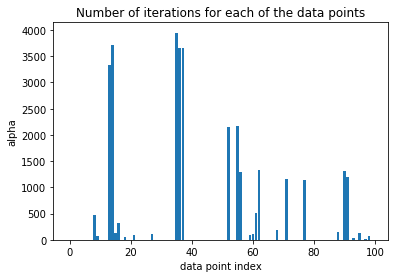

In [102]:
plt.bar(range(len(alpha)),alpha)
plt.xlabel('data point index')
plt.ylabel('alpha')
plt.title('Number of iterations for each of the data points')

It can be seen that a large part of the $\alpha$ values are equal to zero. The new found $\alpha$ values are added to the working dataframe.

In [110]:
df['alpha'] = alpha

In an effort to see which of the points have $\alpha$ values greater than 1000, a new column is created in the dataframe. The new column `high_alpha_value` is 1 if the $\alpha$ is greater than 1000, or 0 otherwise.

In [114]:
high_alpha_value = [1 if a >= 1000 else 0 for a in alpha]
df['high_alpha_value'] = high_alpha_value

The python package `Collections` can be used to count the number of occurences of $\alpha$ values higher than 1000.

In [115]:
Counter(high_alpha_value)

Counter({0: 87, 1: 13})

Seaborn can be used to colour code the 13 points that have $\alpha$ values higher than 1000. 

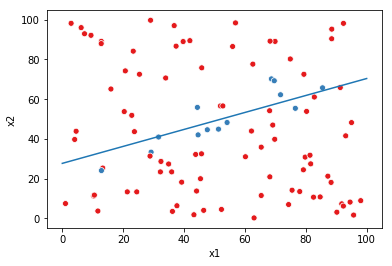

In [116]:
sns.scatterplot(x='x1', y='x2',data=df, hue='high_alpha_value', legend=False, palette="Set1")
plt.plot(x1,x2)

As can be seen, the 13 points with high $\alpha$ coefficients lie close to the linear boundary that is determined by the algorithm.